<a href="https://colab.research.google.com/github/ali-qadir501/Python-Project-1-Maximizing-Revenue-of-Taxi-/blob/main/Maximizing_Revenue_Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem statement**

In the fast-paced taxi booking sector, making the most revenue is essential for long-term success and driver happiness.
our goal is to use data driven insights to maximize revenue streams for taxi drivers in order to meet this need. Our research
aims to determine whether payment metods have an impacts on the fare pricing by focusing on the relationship between payment type and fare amount.

**Objective**

This project's main goal is to run A/B test to examine relationship between the total fare and the method of payment. We use python hypothesis testing and descriptive statistics to extract useful information, that can help taxi drivers generate more cash in particular, we want to find out if there is a big difference in the fares for those who pay with credit card versus those who pay with cash.

**Research Question**

***Is there a relationship between total fare amount and payment type?***

can we nudge costumers towards payment methods that generate higher revenue for drivers, without negatively impacting costumers experience?

**Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')  # supress warnings


**Loading Dataset**

In [ ]:
df = pd.read_csv('https://query.data.world/s/lpgsgkbvtoln7jaopgebfuurqhau5b?dws=00000')

In [ ]:
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


**Exploaratory Data Analysis**

In [ ]:
df.shape


(6405008, 18)

In [ ]:
df.dtypes

,0
VendorID,float64
tpep_pickup_datetime,object
tpep_dropoff_datetime,object
passenger_count,float64
trip_distance,float64
RatecodeID,float64
store_and_fwd_flag,object
PULocationID,int64
DOLocationID,int64
payment_type,float64


In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
#change the data tpye to datetime

In [ ]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration']=df['duration'].dt.total_seconds()/60
#to calculate duration we substract the dropoff by pickup time named it as duration.
#the duration is further divided by seconds to find minutes

In [ ]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000


In [ ]:
df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]
# removing unwanted data/columns

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


filtered dataset

In [ ]:
df = df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]
#stored in original dataframe

In [ ]:
df.isnull().sum() # checking for null values

,0
passenger_count,65441
payment_type,65441
fare_amount,0
trip_distance,0
duration,0


In [ ]:
(65441/len(df))*100  # checking the percentage of missing valuse of total observation

1.021716132126611

In [ ]:
df.dropna(inplace=True) # droping the missing values

In [ ]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [ ]:
#converting the float values to integers
df['passenger_count'] = df['passenger_count'].astype(int)
df['payment_type'] = df['payment_type'].astype(int)


In [ ]:
#checking duplicates
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [ ]:
#removing duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(3007861, 5)

In [ ]:
#checking passenger count and payment type contribution or distribution
df['passenger_count'].value_counts(normalize=True)

,proportion
passenger_count,
1,0.581981
2,0.190350
3,0.066360
5,0.062937
6,0.039272
4,0.036046
0,0.023033
7,0.000009
9,0.000006


In [ ]:
df['payment_type'].value_counts(normalize=True)

,proportion
payment_type,
1,6.782670e-01
2,3.075731e-01
3,8.721480e-03
4,5.438084e-03
5,3.324622e-07


here we found that even (0) is pessenger count which is impossible and 7,8,9 contributing minor. we will remove them

In [ ]:
df=df[df['payment_type']<3]
df=df[(df['passenger_count'] >0)& (df['passenger_count']<6)]

In payment we have to only focus on 1&2. so we romove the rest

In [ ]:
df.shape

(2780283, 5)

In [ ]:
#replacing pament type with card or cash
df['payment_type'].replace([1,2],['card','cash'], inplace=True)

In [ ]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,card,6.0,1.20,4.800000
1,1,card,7.0,1.20,7.416667
2,1,card,6.0,0.60,6.183333
3,1,card,5.5,0.80,4.850000
4,1,cash,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,card,10.0,2.09,14.800000
6339561,1,card,17.5,4.11,21.500000
6339563,1,card,13.0,2.13,19.000000
6339564,1,card,12.5,2.55,16.283333


In [ ]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


after a simple statistical analysis of data we found that the fare amount and some values of ditance are negative values which means these values are wrong values. looking at the values of 25th percentile and max the values suddenly goes up in max which means data has outliers.

In [ ]:
df=df[df['fare_amount']>0]
df=df[df['trip_distance']>0]
df=df[df['duration']>0]

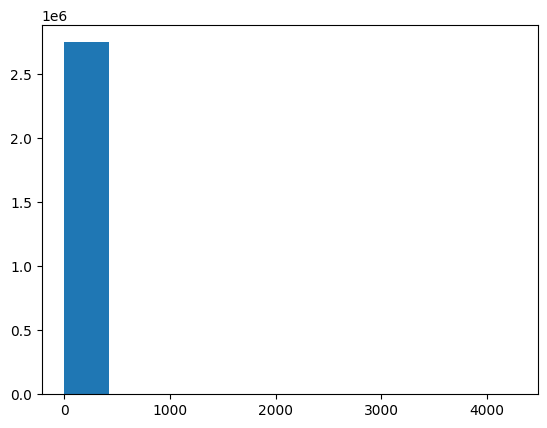

In [ ]:
plt.hist(df['fare_amount'])
plt.show()

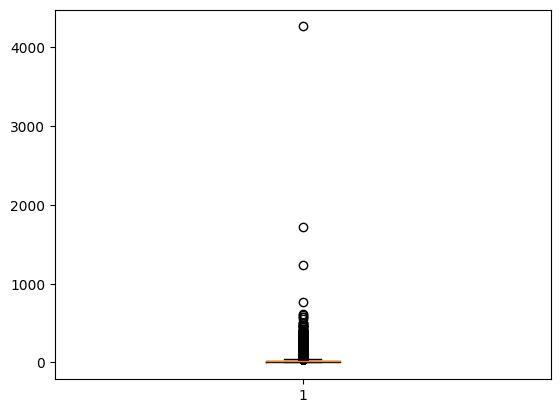

In [ ]:
plt.boxplot(df['fare_amount'])
plt.show()

Through box plot and histogram we visually view that data has outliers for removing outliers we can use two methods z-scores and inter quartile range.
if dat was normally distributed we may use z-scores otherwise we can go for inter quartile range.

In [ ]:
for col in['fare_amount','trip_distance','duration']:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]


In [ ]:
df


,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,card,6.0,1.20,4.800000
1,1,card,7.0,1.20,7.416667
2,1,card,6.0,0.60,6.183333
3,1,card,5.5,0.80,4.850000
5,1,cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,card,10.5,2.40,12.383333
6339555,3,card,10.0,2.09,14.800000
6339561,1,card,17.5,4.11,21.500000
6339563,1,card,13.0,2.13,19.000000


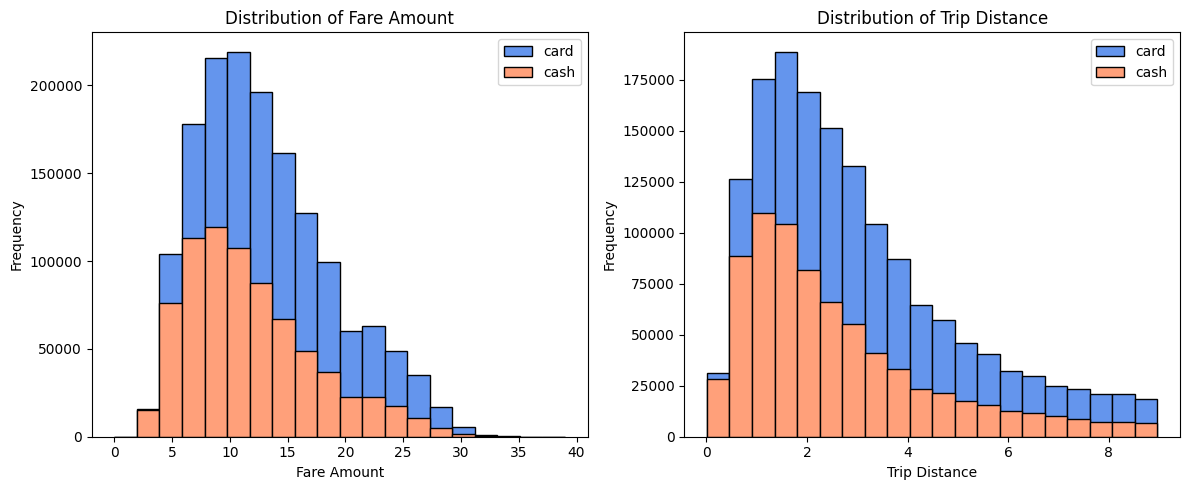

In [ ]:
# firstly we look into fare amount and trip distance, based these two variables
# either costumers are prefering to make payments through card or cash

# Set up the figure
plt.figure(figsize=(12, 5))

# First subplot: Distribution of Fare Amount
plt.subplot(1, 2, 1)
plt.title('Distribution of Fare Amount')
plt.hist(df[df['payment_type'] == 'card']['fare_amount'], histtype='barstacked', bins=20, edgecolor='k', color='#6495ED', label='card')
plt.hist(df[df['payment_type'] == 'cash']['fare_amount'], histtype='barstacked', bins=20, edgecolor='k', color='#FFA07A', label='cash')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.legend()

# Second subplot: Distribution of Trip Distance
plt.subplot(1, 2, 2)
plt.title('Distribution of Trip Distance')
plt.hist(df[df['payment_type'] == 'card']['trip_distance'], histtype='barstacked', bins=20, edgecolor='k', color='#6495ED', label='card')
plt.hist(df[df['payment_type'] == 'cash']['trip_distance'], histtype='barstacked', bins=20, edgecolor='k', color='#FFA07A', label='cash')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
card           13.112493  5.849281      2.992237  1.99274
cash           11.758005  5.613038      2.602207  1.91372

# Card Payments:

**Higher Average Fare:** Card payments are associated with slightly higher fares (mean of $13.11) and longer average trip distances (2.99 miles).
**Possible Preference for Convenience:** Customers using cards might prioritize convenience, especially for longer trips, as card payments can be more seamless for higher fares. They may also feel safer carrying less cash if they anticipate a higher-cost trip.

**Varied Trip Distances:** The relatively high standard deviation in trip distance for card payments indicates that card users have a wide range of trip lengths, from short to long journeys. This might mean that card users have flexible, varied travel patterns.
# Cash Payments:

**Lower Average Fare and Shorter Trip Distance:** Cash users, on average, pay lower fares ($11.76) and take shorter trips (mean distance of 2.60 miles). This might indicate that cash is preferred for quick, short-distance, lower-cost trips, possibly due to immediate payment convenience for smaller amounts.

**Lower Variability in Trip Distance:** The slightly smaller standard deviation for cash payments in both fare and distance suggests that cash-paying customers are more consistent in the type of trips they take, likely favoring predictable, local trips.

Card Payments seem to be preferred for longer and more varied trips, where fare might be higher and convenience is valued.
Cash Payments are preferred for shorter, predictable, and lower-cost trips, potentially where customers feel more comfortable managing smaller, immediate payments without needing a card.

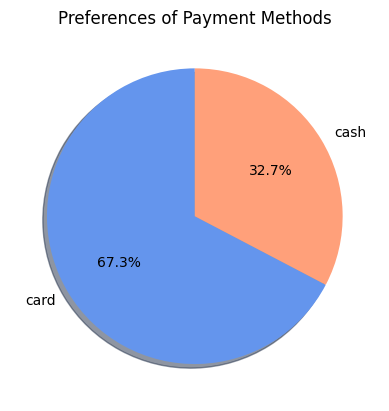

In [ ]:
# now in order to to examine the prefrence regarding choices of payment methods. we also assess porportion of the two types of payments, through visual
# resprestation,  we  have opted to use pie chart. this graphical dipiction will give clear understanding the two distribution of payment methods.


# Set up the title and pie chart
plt.title('Preferences of Payment Methods')
plt.pie(df['payment_type'].value_counts(normalize=True),
        labels=df['payment_type'].value_counts().index,
        startangle=90,
        shadow=True,
        autopct='%1.1f%%',
        colors=['#6495ED', '#FFA07A'])  # Colors matching the histogram

# Display the chart
plt.show()


The proportion of customers paying with cards is significantly higher than those paying with cash. Payments with card accounting for 67.5% of all transaction compared to cash payment at 32.5%.  
This indicates a strong preference among costumers  for using card payment over cash potentially due to convenience, security or incentives offered for card transaction.

# Passenger Count Analysis

Our next step is to analyze payment preferences based on passenger count to determine if customer payment methods vary depending on the number of passengers in the cab. We will use a stacked bar plot for this analysis, as it effectively highlights the percentage distribution of payment types within each passenger count category. This visualization technique will allow us to observe any shifts in payment preferences as the passenger count changes, providing insights into how group size might influence payment method choice.

In [ ]:
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count':'count'}, inplace=True)
passenger_count.reset_index(inplace=True)


In [ ]:
passenger_count['perc']= (passenger_count['count']/passenger_count['count'].sum())*100


In [ ]:
passenger_count

,payment_type,passenger_count,count,perc
0,card,1,909245,39.568381
1,card,2,327661,14.259100
2,card,3,122412,5.327106
3,card,4,63676,2.771042
4,card,5,124045,5.398171
5,cash,1,460550,20.042143
6,cash,2,155472,6.765806
7,cash,3,54506,2.371984
8,cash,4,32715,1.423686
9,cash,5,47626,2.072581


In [ ]:
# Create a DataFrame to store payment type and passenger count data
df_new = pd.DataFrame(columns=['payment_type', 1, 2, 3, 4, 5])

# Define payment types for each row
df_new['payment_type'] = ['card', 'cash']

# Fill the DataFrame with values for each passenger count and payment type
# Using iloc[:, -1] to select the last column
df_new.iloc[0, 1:] = passenger_count.iloc[:5, -1].values  # Card data for passenger counts 1 to 5
df_new.iloc[1, 1:] = passenger_count.iloc[5:,-1].values  # Cash data for passenger counts 1 to 5

df_new



,payment_type,1,2,3,4,5
0,card,39.568381,14.2591,5.327106,2.771042,5.398171
1,cash,20.042143,6.765806,2.371984,1.423686,2.072581


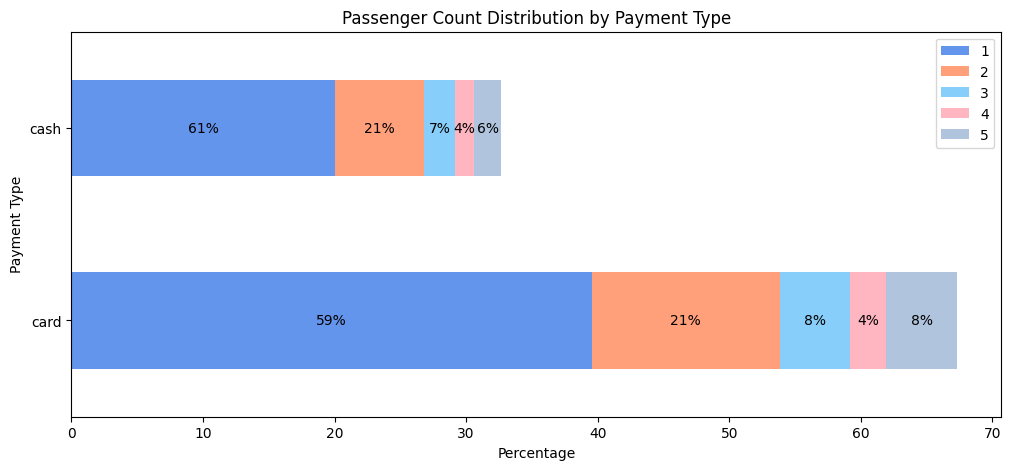

In [ ]:
# Plot the stacked horizontal bar chart
ax = df_new.set_index('payment_type').plot(kind='barh', stacked=True,
                                       color=['#6495ED', '#FFA07A', '#87CEFA', '#FFB6C1', '#B0C4DE'],
                                       figsize=(12, 5))

# Add title and labels
plt.title('Passenger Count Distribution by Payment Type')
plt.xlabel('Percentage')
plt.ylabel('Payment Type')

# Calculate total for each row to determine percentage values
totals = df_new.iloc[:, 1:].sum(axis=1)

# Add percentage text to each bar segment
for i, row in df_new.iterrows():
    cumulative = 0  # Keeps track of cumulative width for proper placement
    for j, value in enumerate(row[1:], start=1):
        percentage = (value / totals[i]) * 100  # Calculate percentage
        if percentage > 0:
            ax.text(cumulative + (value / 2), i, f'{percentage:.0f}%', ha='center', va='center', color='black')
        cumulative += value  # Update cumulative width

# Show the plot
plt.show()




**Passenger Count Analysis**

- Single-passenger rides dominate card transactions, accounting for 40.08% of these payments.
- Cash payments are also mainly associated with single-passenger rides, which represent 20.04% of all cash transactions.
- A decline in transaction percentages is observed as passenger count increases, indicating that larger groups may prefer other transportation options or payment methods.
- These findings highlight the importance of examining both payment type and passenger count in transaction data analysis, as they reveal key insights into customer behavior and preferences.

# Hypothesis Testing

To select the most appropriate test for our analysis, our first step is to evaluate whether the distribution of fare amounts follows a normal distribution. Although the histogram above suggests a deviation from normality, we will confirm this by generating a Quantile-Quantile (QQ) plot.

A QQ plot allows us to assess if the fare amounts for each payment type are approximately normally distributed. If the data points align closely with the diagonal line in the QQ plot, it indicates that the data likely follows a normal distribution.

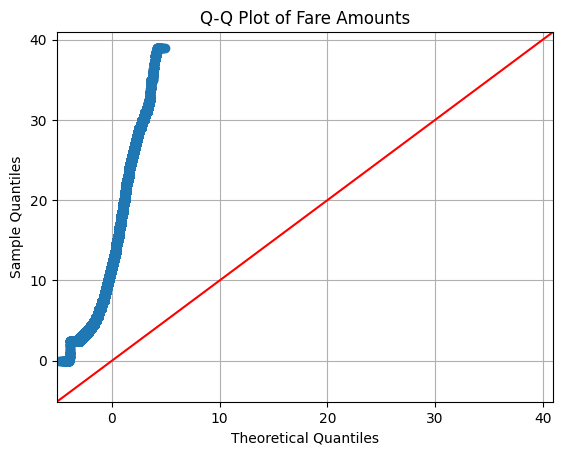

In [ ]:
sm.qqplot(df['fare_amount'], line ='45')
plt.title('Q-Q Plot of Fare Amounts')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

The data values deviate from the red 45-degree line, indicating that they do not follow a normal distribution. Consequently, the z-test is unsuitable for this analysis, and we will instead use the T-test.

The T-test is advantageous because it can be applied to both small and large samples and does not require knowledge of the population standard deviation. This makes it a versatile choice for hypothesis testing in many practical research scenarios, including taxi trip data analysis.

In analyzing NYC Yellow Taxi Trip Records, where the population standard deviation is unknown and datasets may be large, the T-test provides an appropriate and flexible method for comparing means between two groups (e.g., fare amounts by payment type). It accommodates the uncertainty inherent in estimating population parameters from sample data, making it a reliable approach for population inference.

**Null hypothesis:** There is no difference in average fare between customers who use credit cards and customers who use cash.

**Alternative hypothesis:** There is a difference in average fare between customers who use credit cards and customers who use cash.

In [ ]:
#creating samples cash and card
card_sample = df[df['payment_type'] == 'card']['fare_amount']
cash_sample = df[df['payment_type'] == 'cash']['fare_amount']

In [ ]:
t_stats, p_value = stats.ttest_ind(a=card_sample, b= cash_sample, equal_var=False)
print('t-statistic:', t_stats)
print('p-value:', p_value)


t-statistic: 169.2111527245052
p-value: 0.0


**Conclusion:** Reject the Null Hypothesis

With a p-value significantly below the 5% significance level, we reject the null hypothesis.

This indicates a statistically significant difference in the average fare amounts between customers who use credit cards and those who use cash.

*Business Insight:* Encouraging customers to pay with credit cards could potentially increase revenue for taxi drivers.

# Regression Analysis

In [ ]:
print(df.columns)


Index(['passenger_count', 'payment_type', 'fare_amount', 'trip_distance',
       'duration'],
      dtype='object')


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Use 'duration' as the independent variable
X = np.array(df['duration']).reshape(-1, 1)  # Independent variable
y = df['fare_amount']                         # Dependent variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")

# Optionally, print R-squared score
print(f"R-squared: {model.score(X, y)}")


Intercept: 2.527473377407155
Slope: 0.6922301341983751
R-squared: 0.7601694455031393



1. **Intercept (2.527)**: The intercept represents the estimated fare amount when the trip duration is zero. In this context, it could be thought of as a base fare or fixed starting charge for any taxi trip, regardless of trip length.

2. **Slope (0.692)**: The slope indicates that for each additional unit of trip duration (e.g., one minute), the fare amount is expected to increase by approximately 0.692 units (e.g., dollars). This positive relationship suggests that longer trips are associated with higher fares.

3. **R-squared (0.76)**: The R-squared value of 0.76 means that about 76% of the variability in *fare_amount*  can be explained by *duration*. This is a strong R-squared value, indicating that trip duration is a good predictor of fare amount in this model.

In summary, there is a significant positive relationship between trip duration and fare amount, with trip duration explaining a substantial portion of the variation in fares.



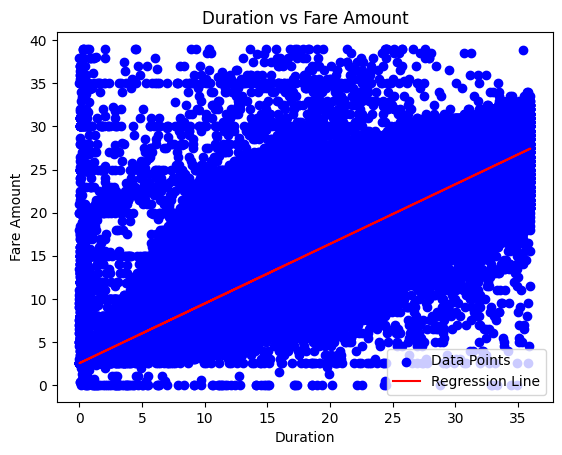

In [ ]:
import matplotlib.pyplot as plt

# Plot scatter plot of 'duration' vs 'fare_amount'
plt.scatter(X, y, color='blue', label="Data Points")

# Plot regression line
plt.plot(X, model.predict(X), color='red', label="Regression Line")

plt.xlabel('Duration')
plt.ylabel('Fare Amount')
plt.title('Duration vs Fare Amount')
plt.legend()
plt.show()
